<a href="https://colab.research.google.com/github/Keshabh/Machine-Learning/blob/main/ML08_GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.shape

(2290, 6)

In [ ]:
df = df.drop(columns=['Date'],axis=1)


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: >

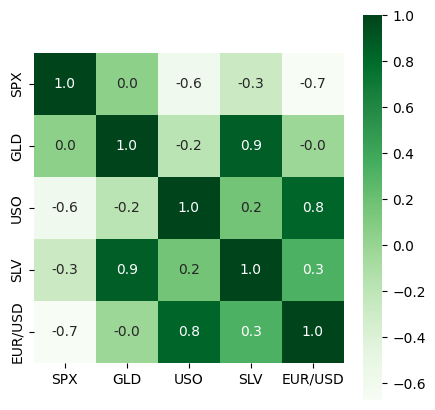

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1F', cmap='Greens')

In [ ]:
df.corr()['SPX']

,SPX
SPX,1.000000
GLD,0.049345
USO,-0.591573
SLV,-0.274055
EUR/USD,-0.672017


/tmp/ipython-input-23-2949298497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SPX'], color ='green')


<Axes: xlabel='SPX', ylabel='Density'>

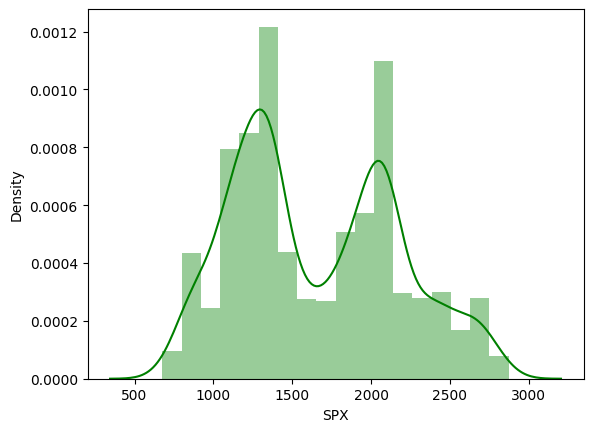

In [ ]:
sns.distplot(df['SPX'], color ='green')

/tmp/ipython-input-24-4244970882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EUR/USD'], color='orange')


<Axes: xlabel='EUR/USD', ylabel='Density'>

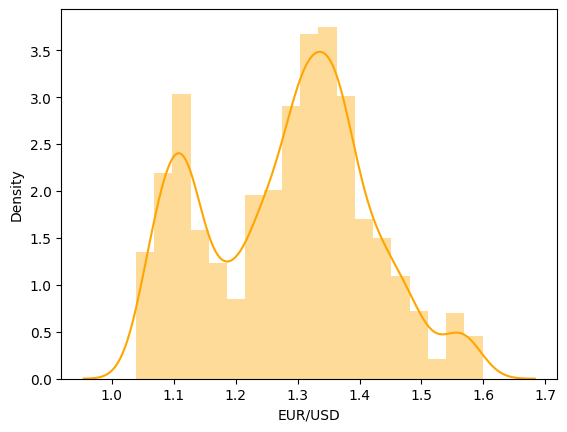

In [ ]:
sns.distplot(df['EUR/USD'], color='orange')

/tmp/ipython-input-25-1535299190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='orange')


<Axes: xlabel='GLD', ylabel='Density'>

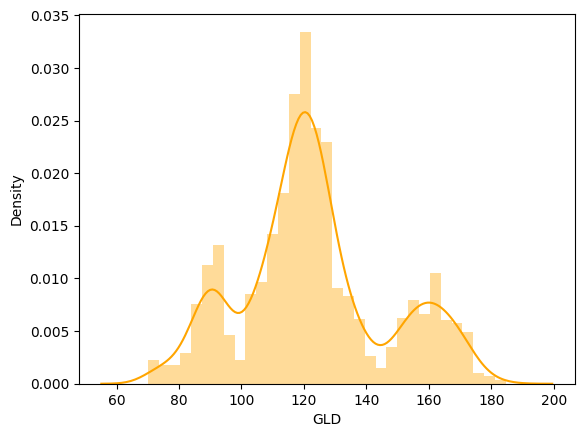

In [ ]:
sns.distplot(df['GLD'], color='orange')

In [ ]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
x = df.drop(['GLD'], axis=1)
y = df['GLD']
print(x.shape, y.shape)

(2290, 4) (2290,)


In [ ]:
# prompt: perform train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1832, 4) (458, 4) (1832,) (458,)


In [ ]:
#model
model = RandomForestRegressor(n_estimators=100, random_state=33)
model.fit(x_train, y_train)
model

RandomForestRegressor(random_state=33)

In [ ]:
#accuracy
import sklearn
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
sklearn.metrics.r2_score(y_train, y_train_pred)

0.9984726039140217

In [ ]:
sklearn.metrics.r2_score(y_test, y_test_pred)

0.989576707579196

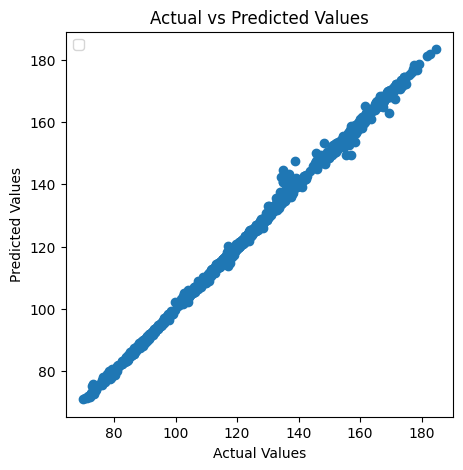

In [ ]:
#lets plot and see the predicted vs actual value
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

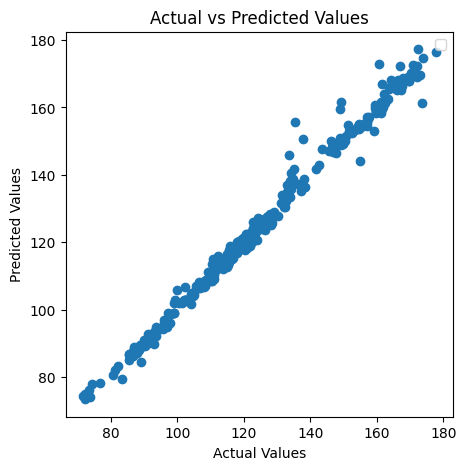

In [ ]:
#lets plot and see the predicted vs actual value
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

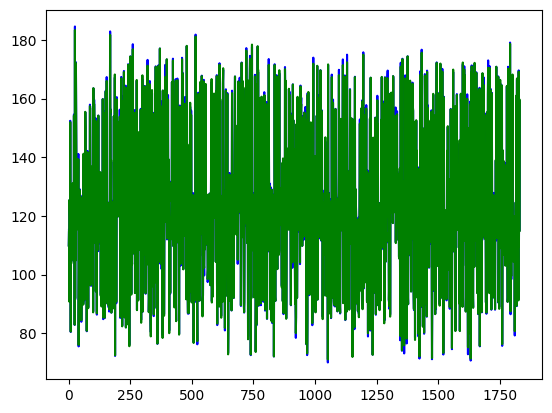

In [ ]:
#now to see if the predicted values are above or below the actual values
plt.plot(y_train.reset_index(drop=True), color='blue', label='Actual Value')
plt.plot(y_train_pred, color='green', label='Predicted Value')
plt.show()

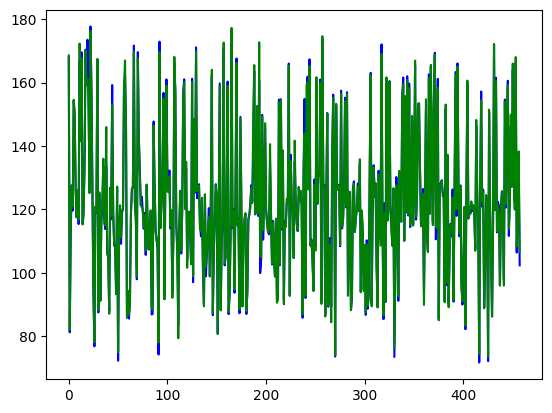

In [ ]:
#now to see if the predicted values are above or below the actual values
plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual Value')
plt.plot(y_test_pred, color='green', label='Predicted Value')